In [ ]:
# Importaciones de bibliotecas
import os
import warnings
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

# Lo usual
warnings.filterwarnings('ignore')

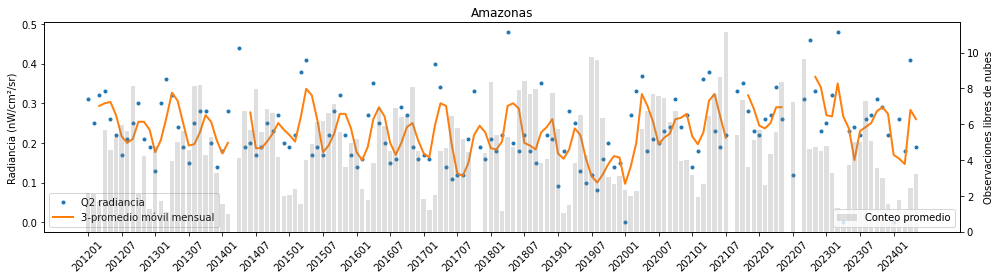

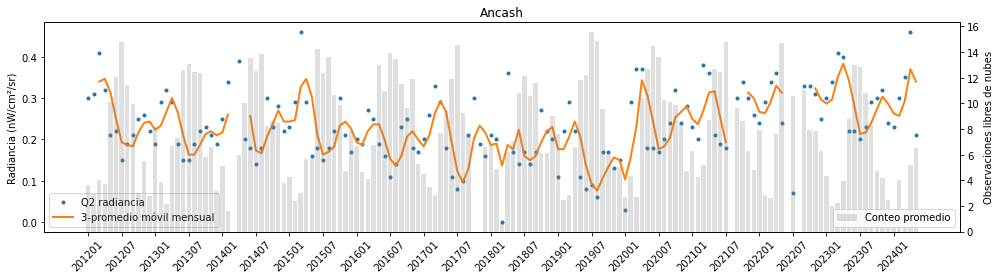

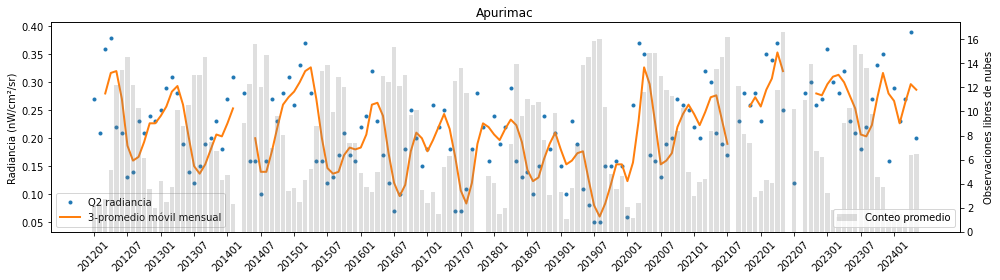

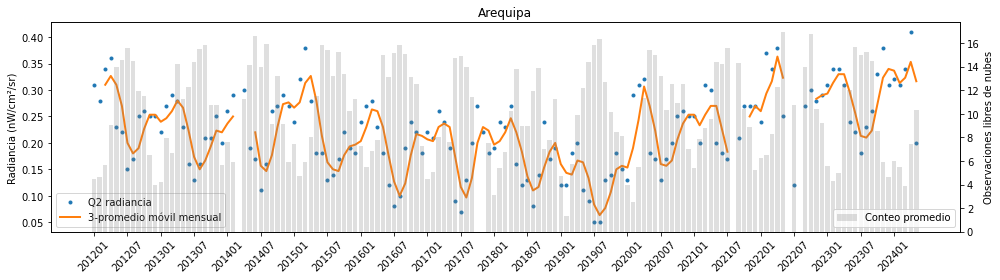

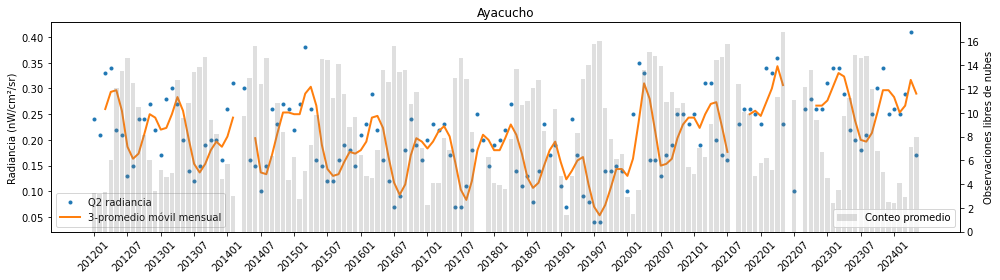

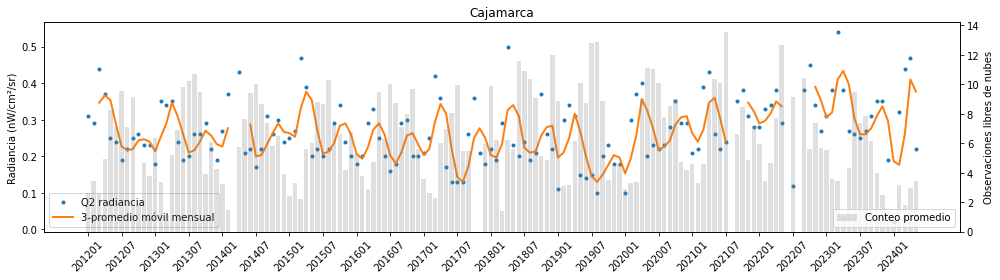

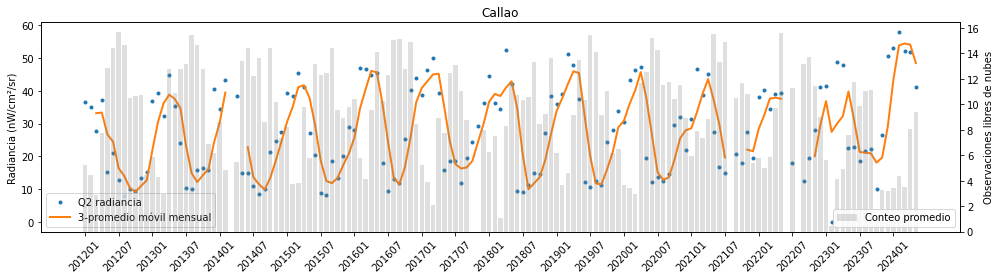

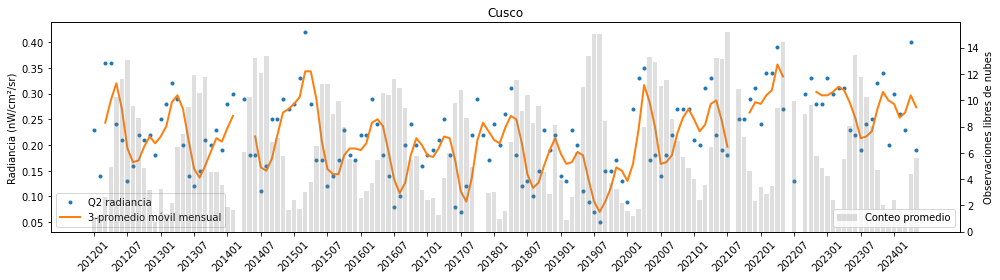

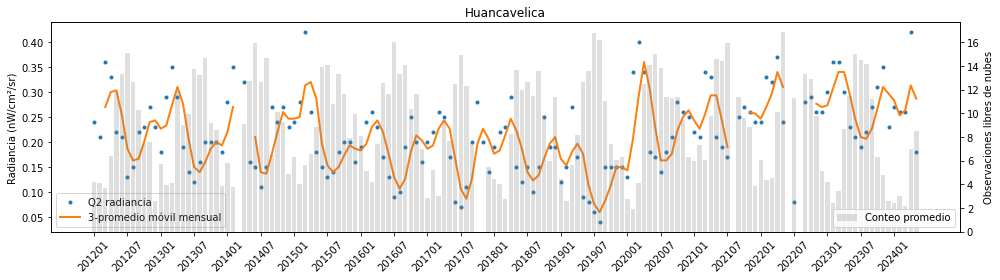

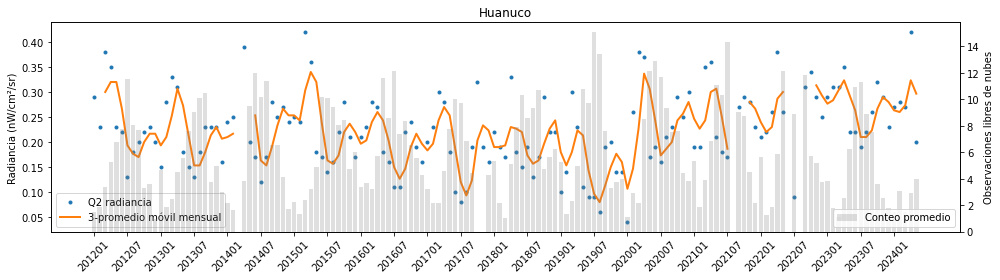

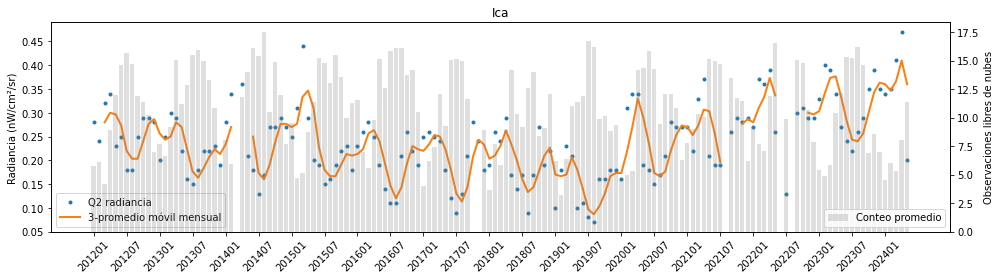

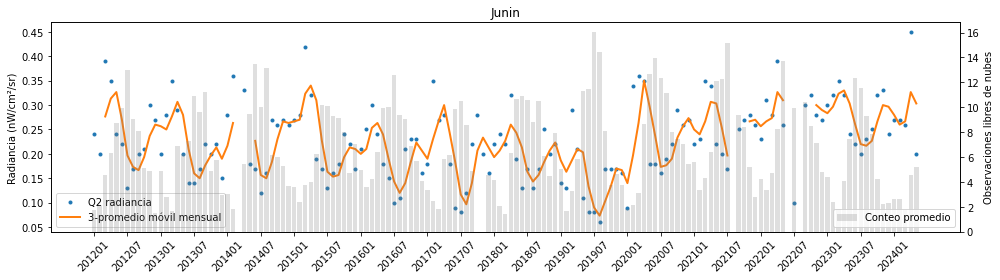

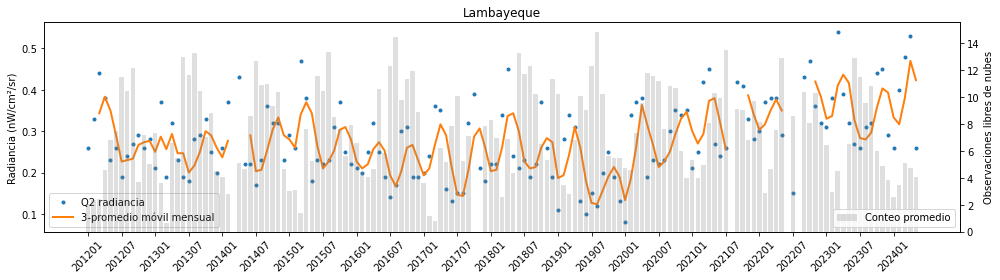

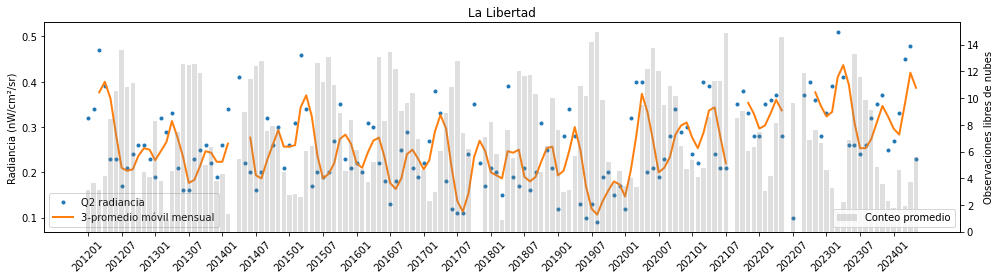

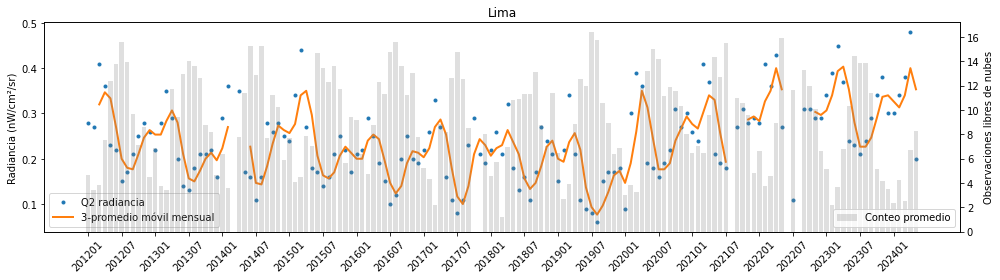

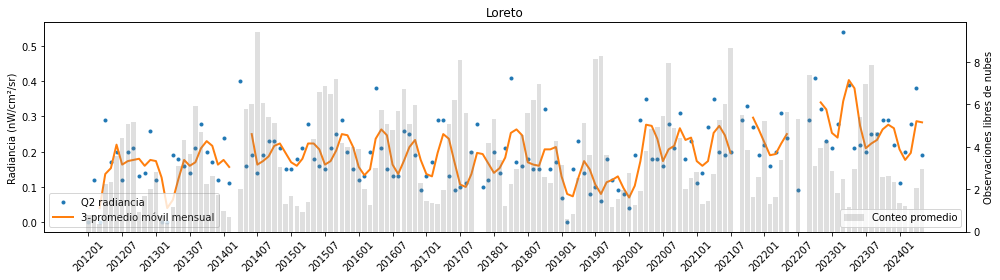

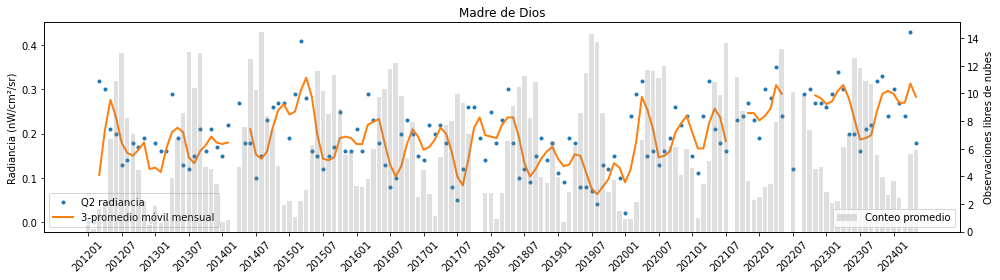

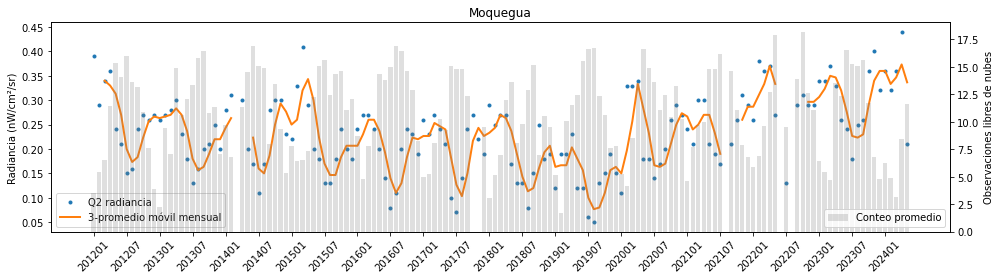

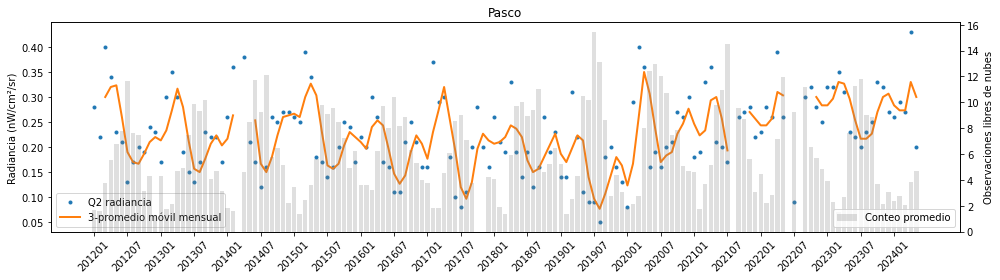

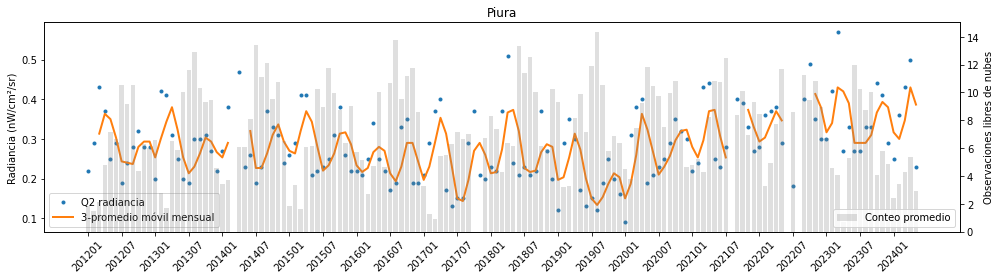

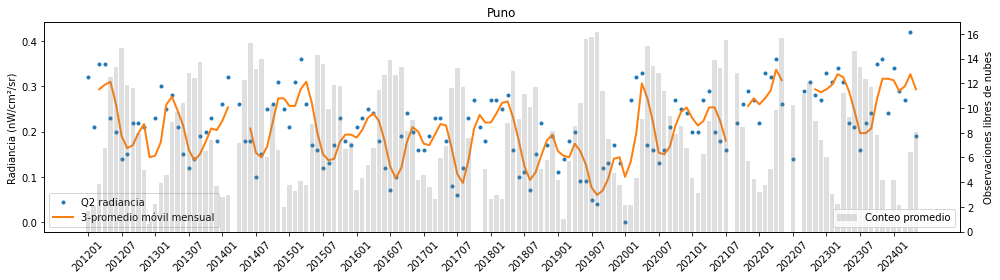

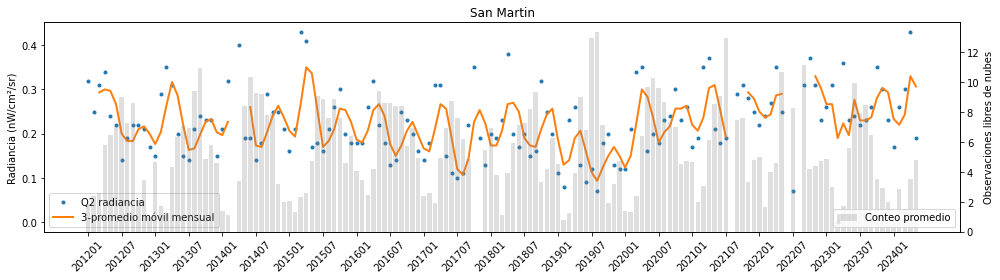

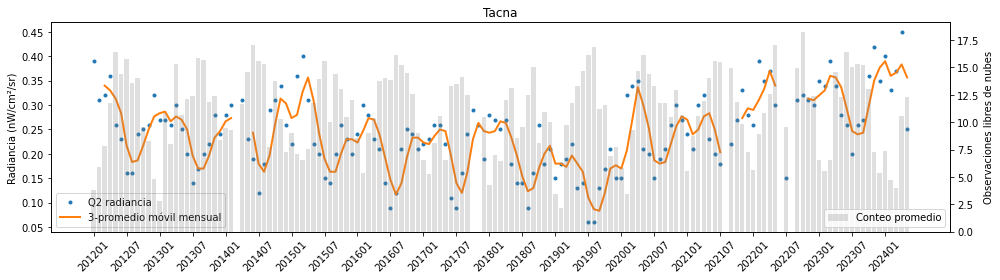

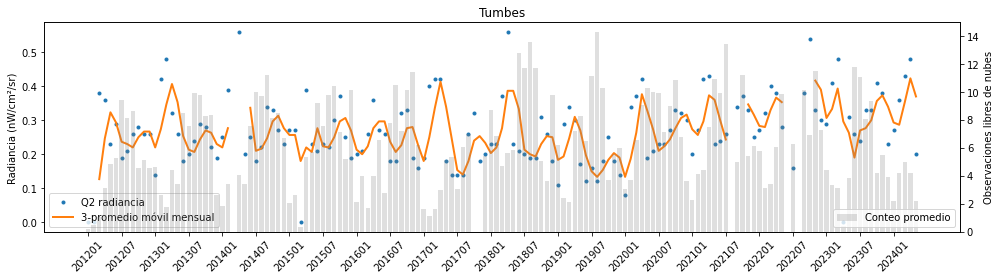

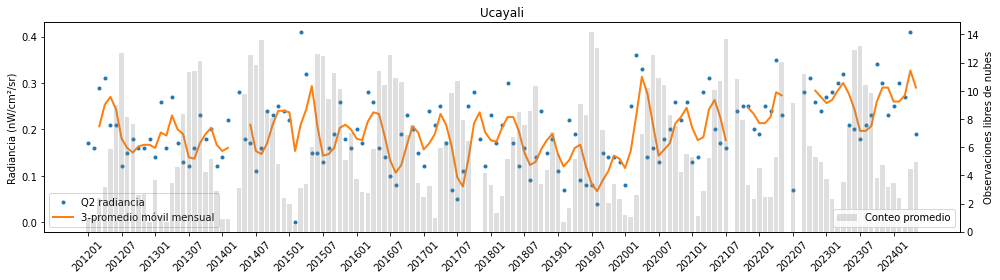

In [ ]:
# Parámetros
col = 'q2'
N = 3

# Rutas
urls = {
    'Amazonas': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02345.csv',
    'Ancash': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02340.csv',
    'Apurimac': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02333.csv',
    'Arequipa': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02326.csv',
    'Ayacucho': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02334.csv',
    'Cajamarca': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02328.csv',
    'Callao': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02336.csv',
    'Cusco': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02332.csv',
    'Huancavelica': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02335.csv',
    'Huanuco': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02341.csv',
    'Ica': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02329.csv',
    'Junin': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02338.csv',
    'Lambayeque': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02343.csv',
    'La Libertad': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02342.csv',
    'Lima': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02337.csv',
    'Loreto': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02348.csv',
    'Madre de Dios': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02327.csv',
    'Moquegua': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02325.csv',
    'Pasco': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02339.csv',
    'Piura': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02346.csv',
    'Puno': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02330.csv',
    'San Martin': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02344.csv',
    'Tacna': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02324.csv',
    'Tumbes': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02347.csv',
    'Ucayali': 'https://eoatlas-nightlight.s3.amazonaws.com/eoatlas-monthly-nightlight-02331.csv',
}

# Procesar y graficar cada archivo
for ciudad, url in urls.items():
    filename = os.path.basename(url)
    urllib.request.urlretrieve(url, filename)

    # Cargar los datos
    df = pd.read_csv(filename)
    os.remove(filename)
    x = [f"{y}{m:02d}" for y, m in zip(df.year.values, df.month.values)]

    # Gráfico
    fig, ax1 = plt.subplots(1, 1, figsize=(14, 4))
    ax1.plot(x, df[col], '.', linewidth=1.0, label=f"{col.capitalize()} radiancia")
    ax1.plot(x, df[col].rolling(window=N).mean(), '-', linewidth=2.0, label=f"{N}-promedio móvil mensual")
    ax2 = ax1.twinx()
    ax2.bar(x, df['cloudFree'], color='gray', alpha=0.25, label=f"Conteo promedio")
    ax1.set_title(f"{ciudad}")
    ax1.set_ylabel(f"Radiancia ({df.unit.unique()[0]})")
    ax2.set_ylabel("Observaciones libres de nubes")
    ax1.set_xticks(ax1.get_xticks()[::6])
    ax1.tick_params(axis='x', labelrotation=45)
    ax1.legend(loc='lower left', ncol=1)
    ax2.legend(loc='lower right')
    ax1.grid(False)
    fig.tight_layout()
    plt.show()